In [1]:

# ======================================
# LIBRETA DE PROCESAMIENTO BÁSICO - OBSIPY
# Curso de Sismología
# ======================================

# ---- Celda 1: Importar módulos necesarios ----
import matplotlib.pyplot as plt
import numpy as np
from obspy import read
from obspy.signal.tf_misfit import plot_tfr


3 Trace(s) in Stream:
CU.BCIP.00.BH1 | 2025-07-29T23:37:33.019538Z - 2025-07-30T00:08:32.994538Z | 40.0 Hz, 74400 samples
CU.BCIP.00.BH2 | 2025-07-29T23:37:33.019538Z - 2025-07-30T00:08:32.994538Z | 40.0 Hz, 74400 samples
CU.BCIP.00.BHZ | 2025-07-29T23:37:33.019538Z - 2025-07-30T00:08:32.994538Z | 40.0 Hz, 74400 samples


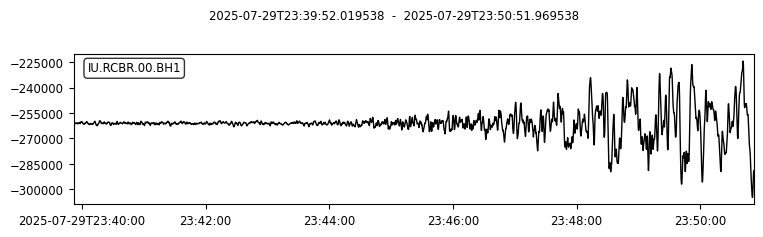

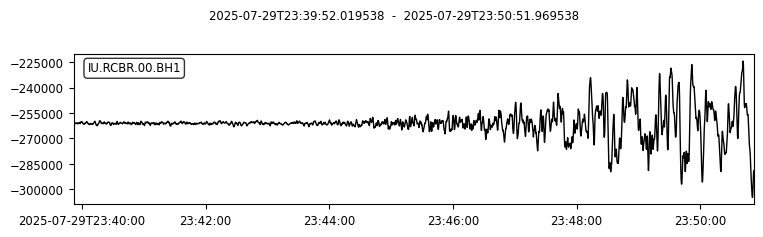

In [111]:

# ---- Celda 2: Leer sismograma ----
# Cambiar la ruta del archivo según el sismograma descargado
# Ejemplo: "20250101.mseed" o cualquier archivo .sac / .mseed
st_30 = read('2025-07-29mww88off-east-coast-of-kamchatka-3.miniseed')
st_99 = read("../Proyecto/2025-07-29mww88off-east-coast-of-kamchatka.miniseed") #Estación Panamá
st_60= read('../Parcial1/2025-07-29-mww88off-east-coast-of-kamchatka.miniseed') # Estación Uzbekistan

print(st_PET)
st_130[0].plot()  # Visualización rápida con obspy


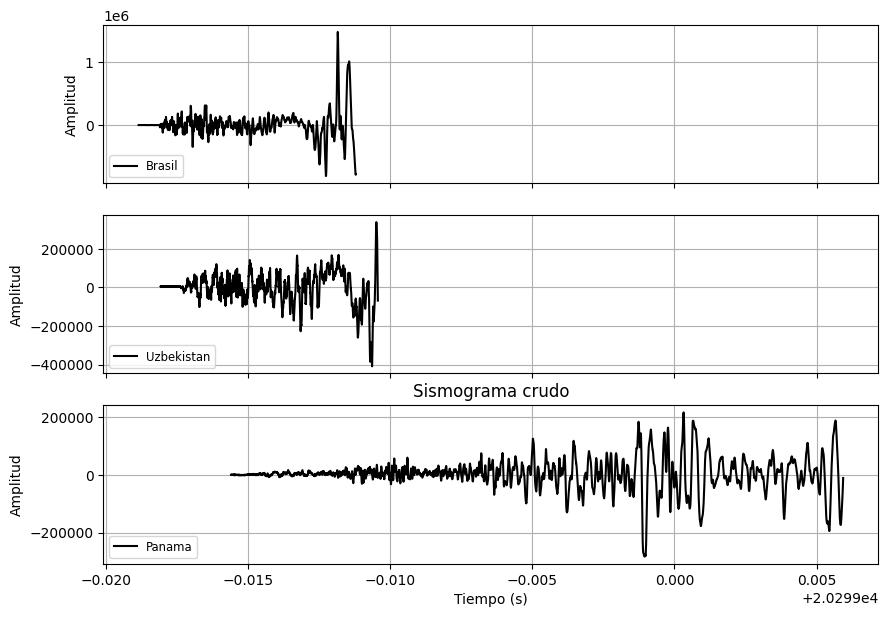

In [116]:

# ---- Celda 3: Graficar el sismograma crudo ----
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 7))  # 5 rows, 1 column

axs[0].plot(st_30[0].times("matplotlib"), st_30[0].data, color="black",label='Brasil')
axs[1].plot(st_60[0].times("matplotlib"), st_60[0].data, color="black",label='Uzbekistan')
axs[2].plot(st_99[0].times("matplotlib")[:100000000000], st_99[0].data[:100000000000], color="black",label='Panama')

for ax in axs:
    ax.set_ylabel('Amplitud') 
    ax.legend(loc='lower left', fontsize='small')
    ax.grid(True)
plt.title("Sismograma crudo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()


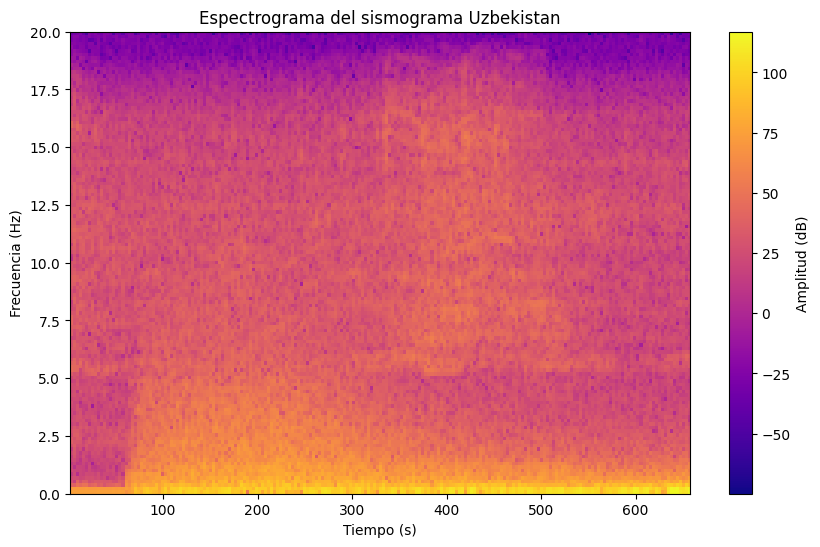

In [117]:

# ---- Celda 4: Espectrograma ----
# Usamos matplotlib directamente para ver el contenido espectral
plt.figure(figsize=(10,6))
plt.specgram(st_60[0].data, NFFT=256, Fs=st_60[0].stats.sampling_rate, cmap="plasma")
plt.title("Espectrograma del sismograma Uzbekistan")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.colorbar(label="Amplitud (dB)")
plt.show()


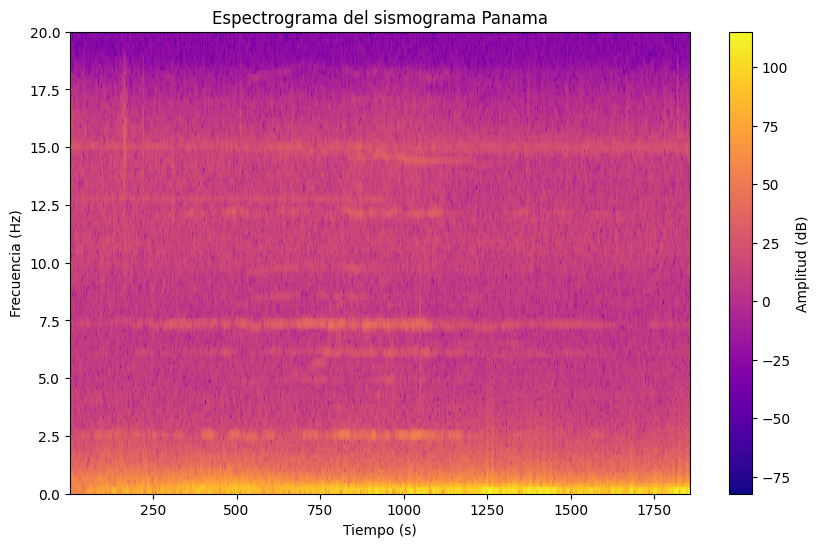

In [118]:
plt.figure(figsize=(10,6))
plt.specgram(st_99[0].data, NFFT=256, Fs=st_99[0].stats.sampling_rate, cmap="plasma")
plt.title("Espectrograma del sismograma Panama")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.colorbar(label="Amplitud (dB)")
plt.show()

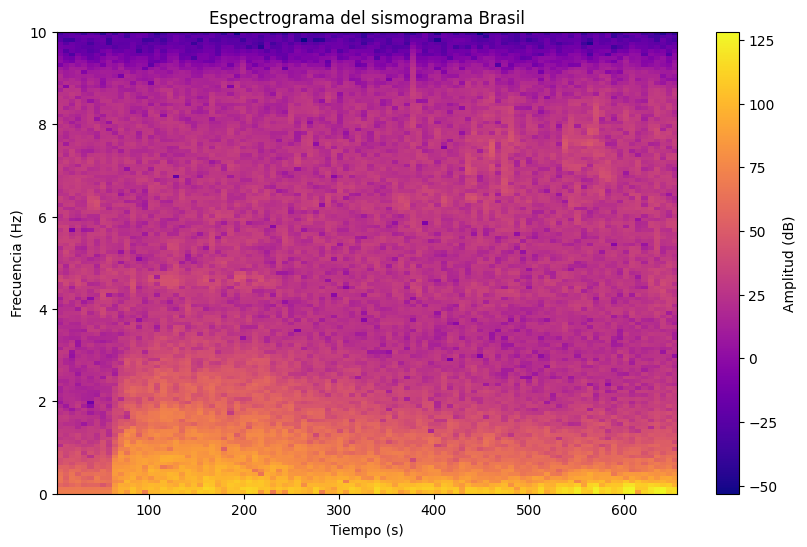

In [119]:
plt.figure(figsize=(10,6))
plt.specgram(st_30[0].data, NFFT=256, Fs=st_30[0].stats.sampling_rate, cmap="plasma")
plt.title("Espectrograma del sismograma Brasil")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.colorbar(label="Amplitud (dB)")
plt.show()

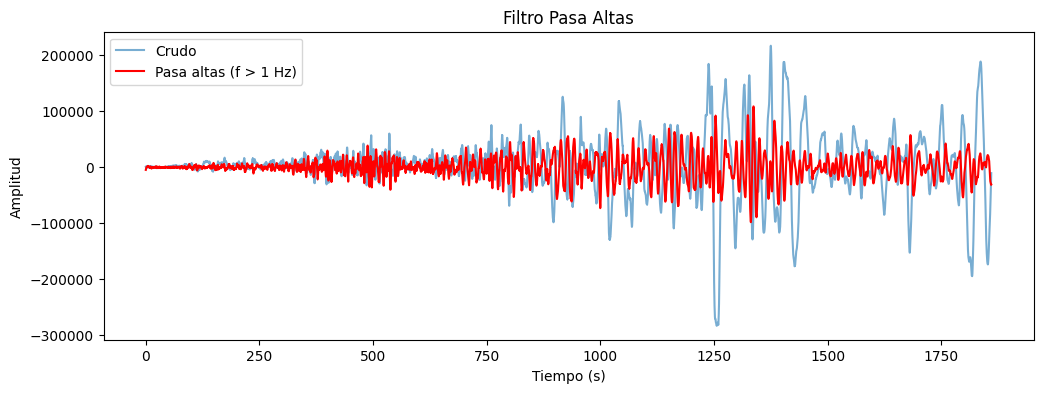

In [120]:

# ---- Celda 5: Filtro pasa altas ----
tr_hp = st_99[0].copy()
tr_hp.detrend("linear")
tr_hp.filter("highpass", freq=0.05)  # cambiar freq según se necesite

plt.figure(figsize=(12,4))
plt.plot(st_99[0].times(), st_99[0].data, label="Crudo", alpha=0.6)
plt.plot(tr_hp.times(), tr_hp.data, label="Pasa altas (f > 1 Hz)", color="red")
plt.title("Filtro Pasa Altas")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()


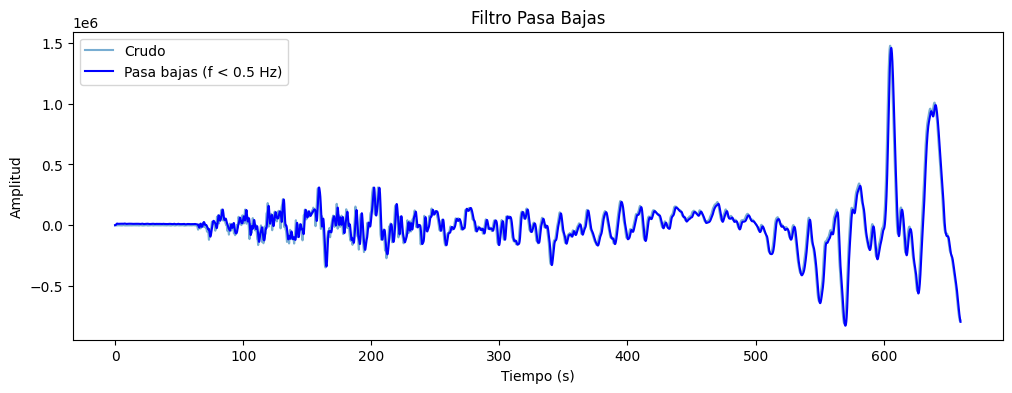

In [169]:

# ---- Celda 6: Filtro pasa bajas ----
tr_lp = st_30[0].copy()
tr_lp.detrend("linear")
tr_lp.filter("lowpass", freq=.5)  # cambiar freq según se necesite

plt.figure(figsize=(12,4))
plt.plot(st_30[0].times(), st_30[0].data, label="Crudo", alpha=0.6)
plt.plot(tr_lp.times(), tr_lp.data, label="Pasa bajas (f < 0.5 Hz)", color="blue")
plt.title("Filtro Pasa Bajas")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()


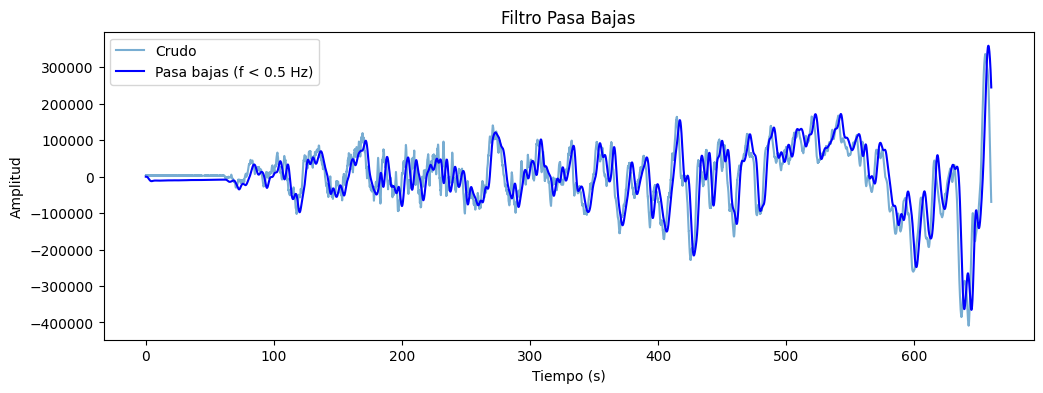

In [171]:

tr_lp = st_60[0].copy()
tr_lp.detrend("linear")
tr_lp.filter("lowpass", freq=.2)  # cambiar freq según se necesite

plt.figure(figsize=(12,4))
plt.plot(st_60[0].times(), st_60[0].data, label="Crudo", alpha=0.6)
plt.plot(tr_lp.times(), tr_lp.data, label="Pasa bajas (f < 0.5 Hz)", color="blue")
plt.title("Filtro Pasa Bajas")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()


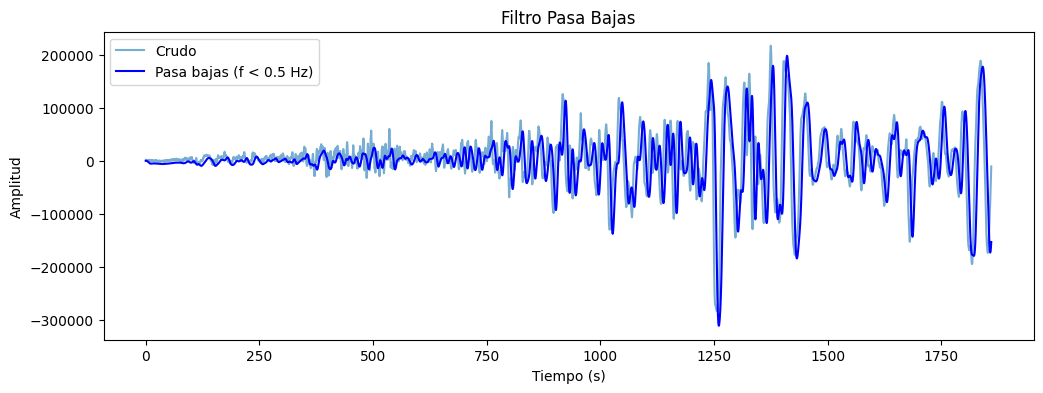

In [173]:
tr_lp = st_99[0].copy()
tr_lp.detrend("linear")
tr_lp.filter("lowpass", freq=0.08)  # cambiar freq según se necesite

plt.figure(figsize=(12,4))
plt.plot(st_99[0].times(), st_99[0].data, label="Crudo", alpha=0.6)
plt.plot(tr_lp.times(), tr_lp.data, label="Pasa bajas (f < 0.5 Hz)", color="blue")
plt.title("Filtro Pasa Bajas")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

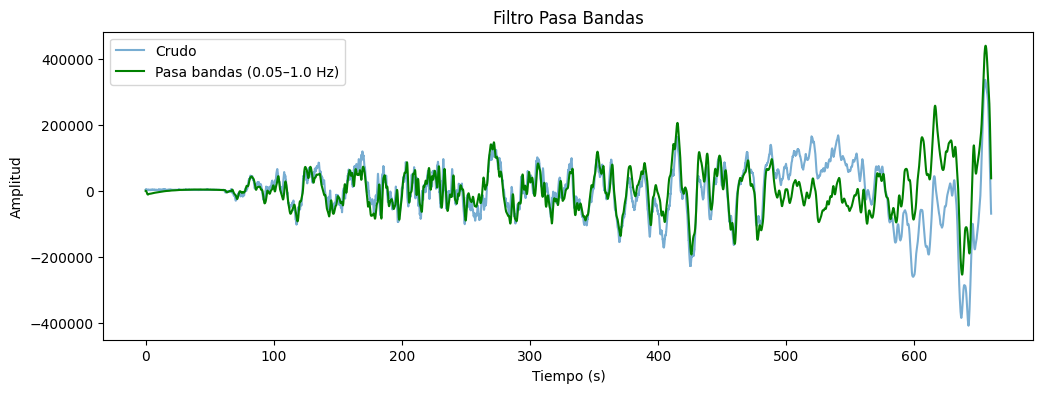

In [162]:

# ---- Celda 7: Filtro pasa bandas ----
tr_bp = st_60[0].copy()
tr_bp.detrend("linear")
tr_bp.filter("bandpass", freqmin=0.005, freqmax=.5)  # ajustar banda según interés

plt.figure(figsize=(12,4))
plt.plot(st_60[0].times(), st_60[0].data, label="Crudo", alpha=0.6)
plt.plot(tr_bp.times(), tr_bp.data, label="Pasa bandas (0.05–1.0 Hz)", color="green")
plt.title("Filtro Pasa Bandas")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()


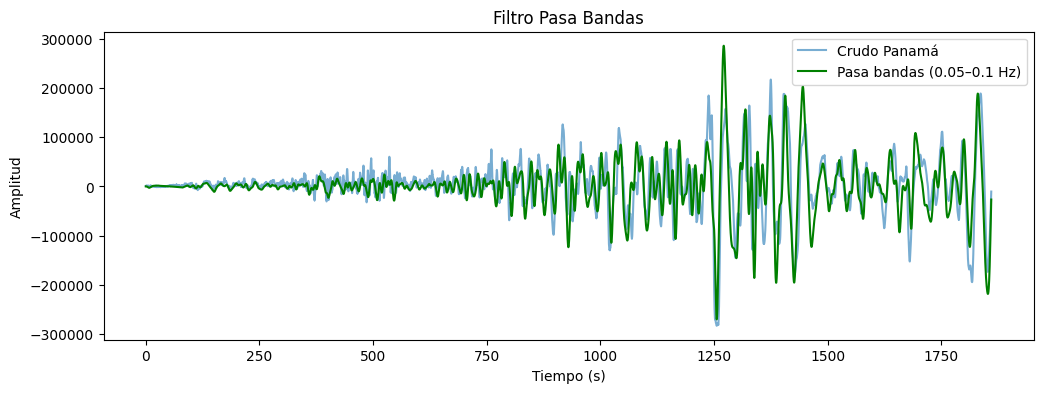

In [160]:
tr_bp = st_99[0].copy()
tr_bp.detrend("linear")
tr_bp.filter("bandpass", freqmin=0.01, freqmax=0.1)  # ajustar banda según interés

plt.figure(figsize=(12,4))
plt.plot(st_99[0].times(), st_99[0].data, label="Crudo Panamá", alpha=0.6)
plt.plot(tr_bp.times(), tr_bp.data, label="Pasa bandas (0.05–0.1 Hz)", color="green")
plt.title("Filtro Pasa Bandas")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

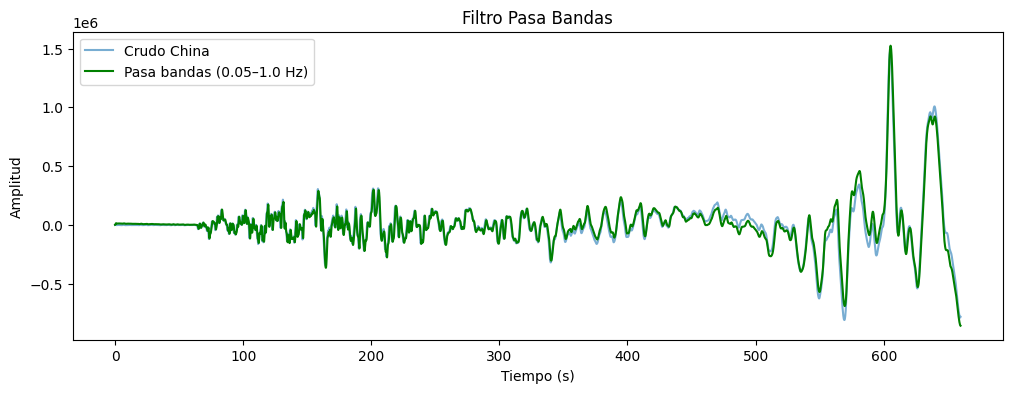

In [161]:
tr_bp = st_30[0].copy()
tr_bp.detrend("linear")
tr_bp.filter("bandpass", freqmin=0.001, freqmax=1.)  # ajustar banda según interés

plt.figure(figsize=(12,4))
plt.plot(st_30[0].times(), st_30[0].data, label="Crudo China", alpha=0.6)
plt.plot(tr_bp.times(), tr_bp.data, label="Pasa bandas (0.05–1.0 Hz)", color="green")
plt.title("Filtro Pasa Bandas")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()